In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
import sys
root_path = "/".join(sys.path[0].split("/")[:-1])
sys.path.append(root_path)
sys.path.append(root_path + "/src")
sys.path.append(root_path + "/env")
sys.path.append(root_path + "/model")
sys.path.append(root_path + "/data")

In [3]:
from pickle_func import loadPickle

In [4]:
arm_num = 10
epsilon = 0.1
env = loadPickle("../env_instance/GaussianBanditEnv_arm-num=" + str(arm_num) + ".pickle")
epsilon_greedy = loadPickle("../model_instance/epsilon_greedy_epsilon=" + str(epsilon) + ".pickle")

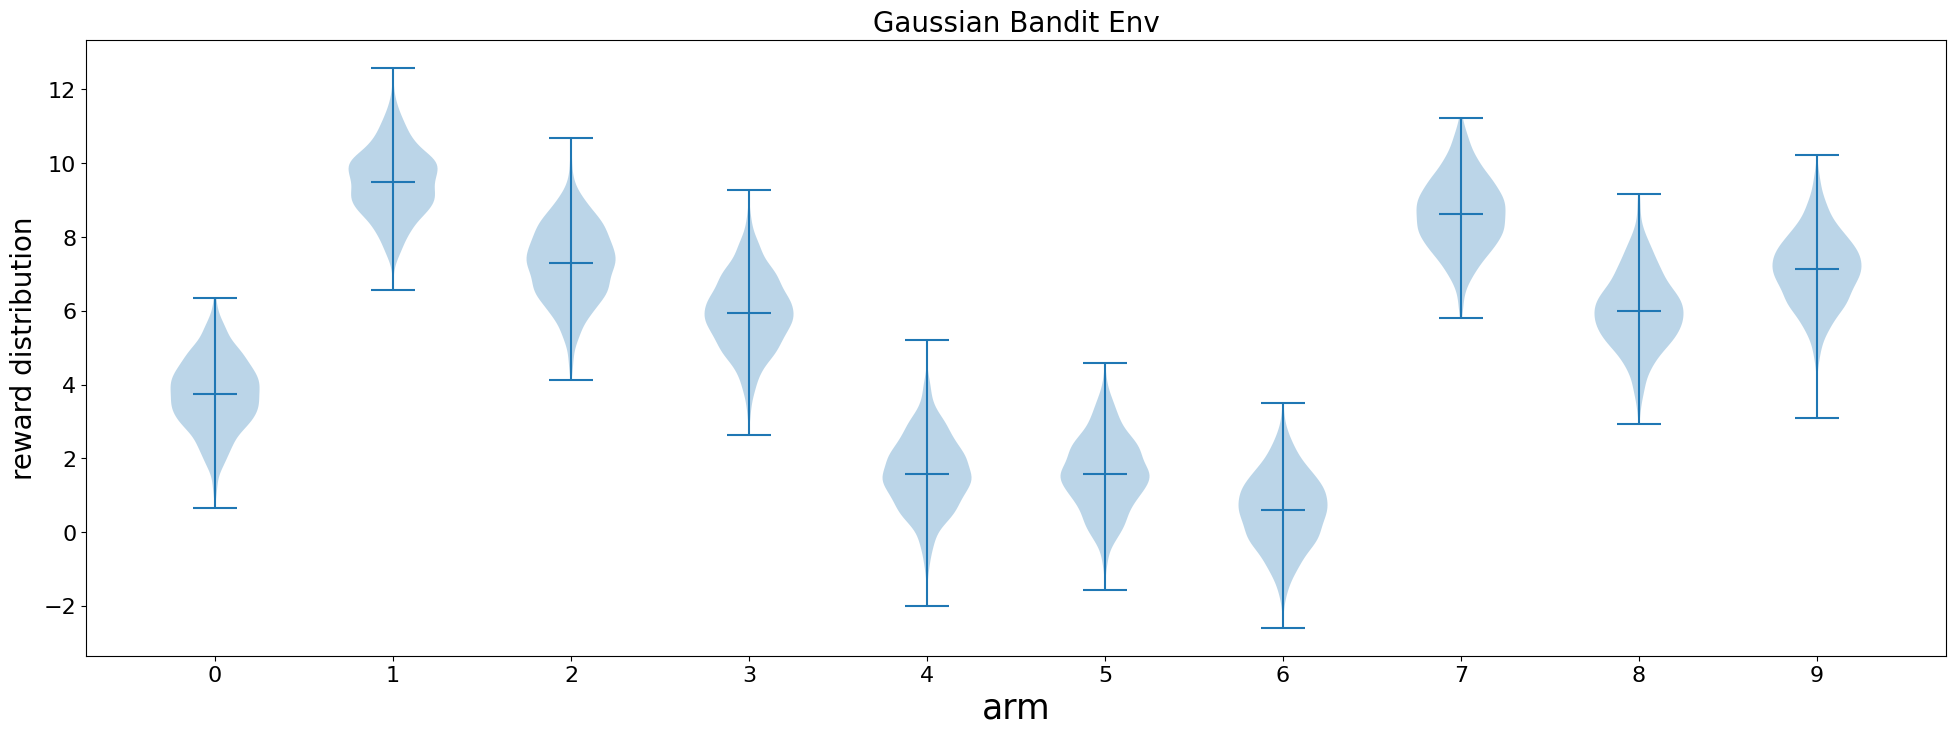

In [10]:
# GaussianBanditEnvの可視化
all_data = [
    np.random.normal(mean_i, sigma_i, 1000) for mean_i, sigma_i in zip(env.true_rewards, env.true_sigmas)
]
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1,1,1)
ax.violinplot(all_data, showmeans=True)
#ax.plot(np.arange(env.arm_num)+1, env.true_rewards, marker="*", color="peru")
ax.set_xlabel("arm", fontsize=25)
ax.set_ylabel("reward distribution", fontsize=20)
ax.set_title("Gaussian Bandit Env", fontsize=20)
ax.set_xticks(np.arange(env.arm_num)+1)
ax.set_xticklabels(np.arange(env.arm_num))
ax.tick_params(labelsize=16)
fig.savefig("../imgs/img_bandit/GaussianBanditEnv_arm-num=" + str(arm_num) + ".png")

In [30]:
reward_array_dict = loadPickle("../data/reward_data/GaussianBandit.pickle")

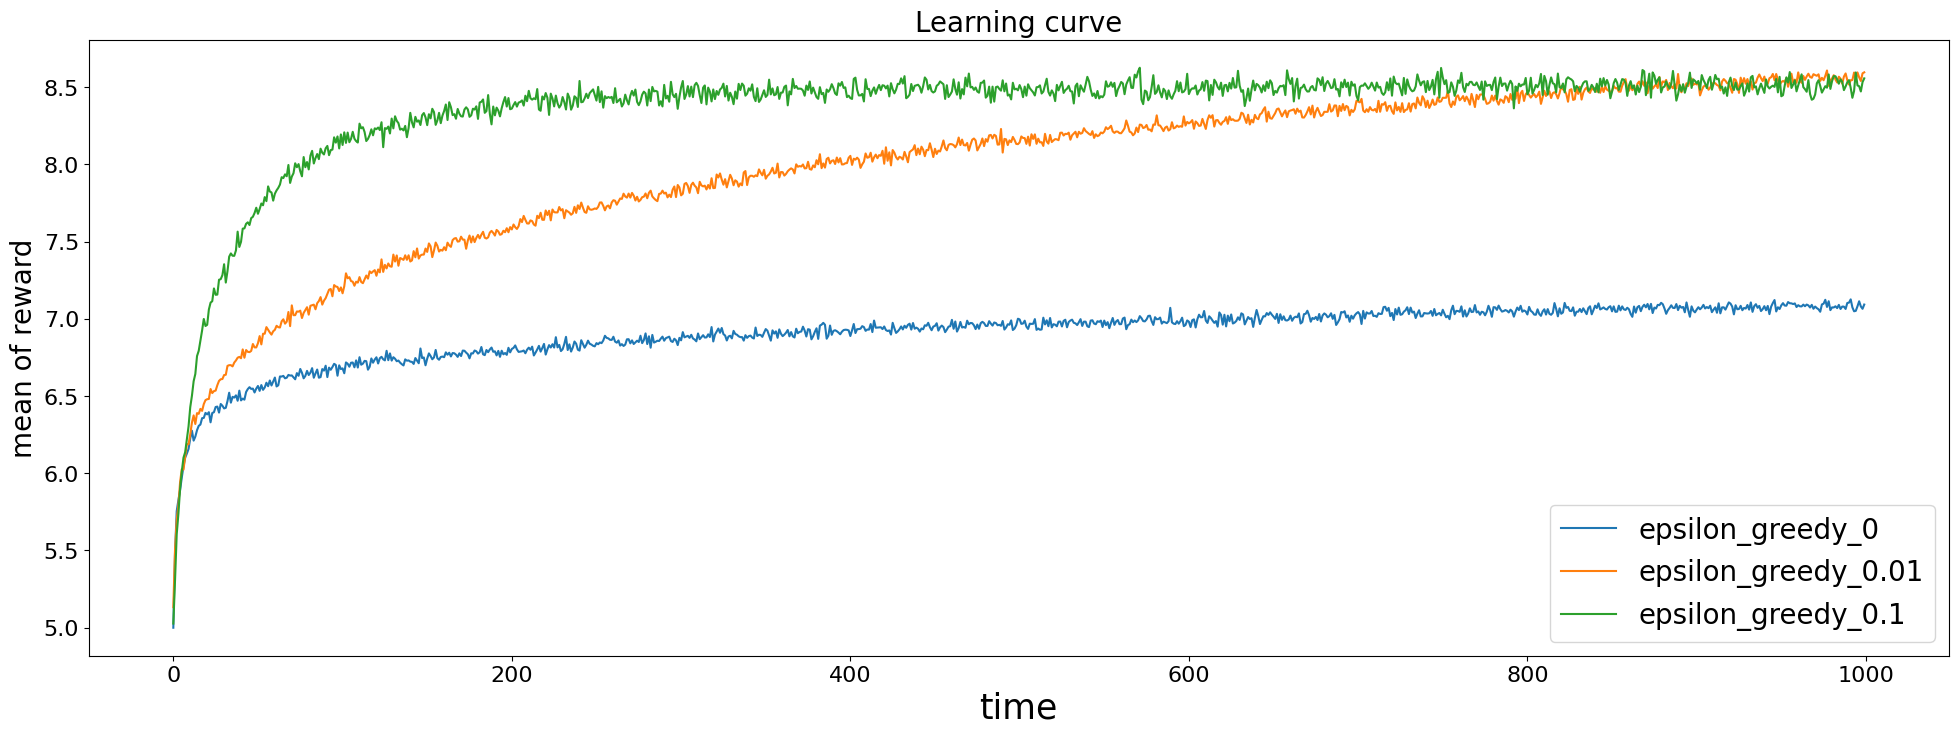

In [31]:
learning_time = 1000
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1,1,1)
for key, value in reward_array_dict.items():
    ax.plot(range(learning_time), value.mean(axis=1), label=key)
ax.set_xlabel("time", fontsize=25)
ax.set_ylabel("mean of reward", fontsize=20)
ax.set_title("Learning curve", fontsize=20)
ax.tick_params(labelsize=16)
plt.legend(fontsize=20)
plt.show()

fig.savefig("../imgs/img_bandit/reward_plot.png")

# 非定常バンディット

In [13]:
reward_array_dict = loadPickle("../data/reward_data/SteadyBandit.pickle")

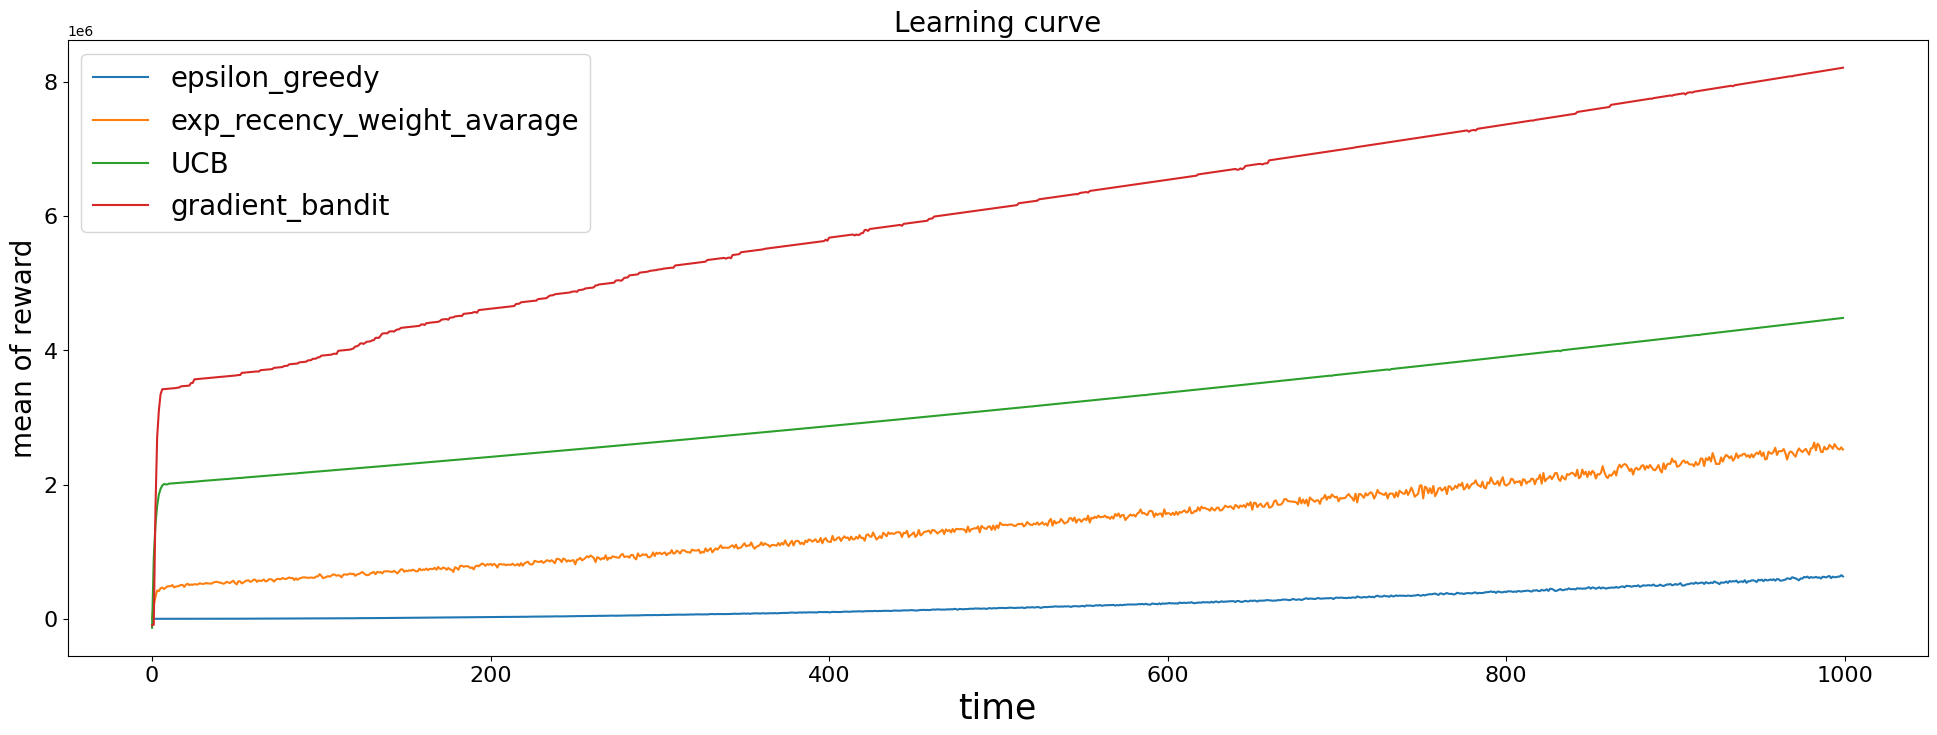

In [14]:
learning_time = 1000
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1,1,1)
for key, value in reward_array_dict.items():
    ax.plot(range(learning_time), value.mean(axis=1), label=key)
ax.set_xlabel("time", fontsize=25)
ax.set_ylabel("mean of reward", fontsize=20)
ax.set_title("Learning curve", fontsize=20)
ax.tick_params(labelsize=16)
plt.legend(fontsize=20)
plt.show()

fig.savefig("../imgs/img_unsteady_bandit/reward_plot.png")